In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.color_palette('Set2')

import warnings
warnings.filterwarnings("ignore")

## Create a synthetic dataset

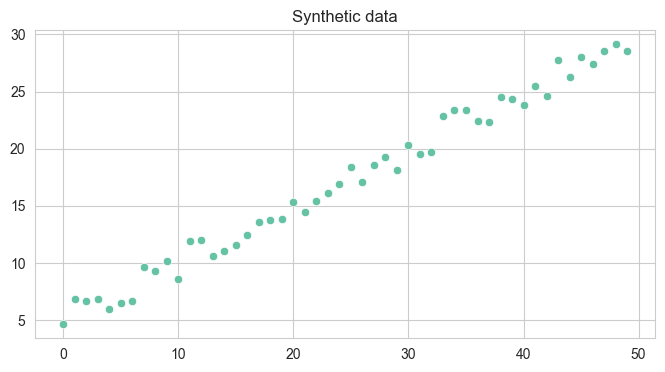

In [2]:
#Task: annotate each line of this code to understand what each step is doing
np.random.seed(42)

n = 50
x = np.arange(n)
noise = (np.random.random(n) - 0.5) * 3
bias = 5
y = 0.5*x + bias + noise

fig, ax = plt.subplots(1, 1, dpi=100, figsize=(8,4))
sns.scatterplot(x=x, y=y, ax=ax)

plt.title('Synthetic data')
plt.show()

From your reading assignment, what is `bias`? What does it do to a model?

## Gradient Descent from scratch

For this exercise we will code together the gradient descent algorithm. Our goal is to minimize the MSE loss function and find the line of best fit using the synthetic data from the previous cell. Using this data we will find the best weights/coefficients for the function 

$$ \hat{y} = w_1 * X_1 + w_2 * X_2 + w3 $$

We will do the following steps in the algorithm: 

1. Initialize weights randomly:

$$ w_1 = .037 $$
$$  w_2 = .095 $$
$$ w_3 = .01 $$

2. Calculate Gradient & Update Weights 

    Define our loss function as
$$MSE = \sum_{i=1}^{n}(y_i - \hat{y})^2 $$ where 
$$ \hat{y} = w_1 * X_1 + w_2 * X_2 + w3 $$


    Calculate the gradient or partial derivatives for each weight to take a step towards a better prediction
    
$$\frac{\partial f}{\partial w_1} = \frac{1}{n}\sum_{i=1}^{n}-2x_1(y_i - (w_1x_1+w_2x_2+w_3))$$
$$\frac{\partial f}{\partial w_2} = \frac{1}{n}\sum_{i=1}^{n}2x_2(y_i - (w_1x_1+w_2x_2+w_3))$$
$$\frac{\partial f}{\partial w_3} = \frac{1}{n}\sum_{i=1}^{n}2(y_i - (w_1x_1+w_2x_2+w_3))$$
  

3. Compute loss and repeat step 2 until we reach max number of iterations or stopping critetion

In [3]:
#Task: annotate each line of this code to understand what each step is doing

np.random.seed(42)
X = x.reshape(-1,1)
b = np.ones(X.shape[0]).reshape(-1,1)
X = np.concatenate([b, X], axis=1)

In [4]:
def run_gradient_descent(X, y, learning_rate=1e-3, max_iter=10000):
    w1, w2, w3 = 0.03745401, 0.09507143, 0.01 #initialize weights 
    stop_criterion = 1e-5
    N = len(y)
    error = 50
    
    #store results
    log = [] 
    mse = []
    
    while max_iter > 0: 
        f = y - (w1*X[:,0] + w2*X[:,1]+ w3)
        
        #calculate gradient & update weights 
        w1 -= learning_rate * (-2 * X[:, 0].dot(f).sum() / N )
        w2 -= learning_rate * (-2 * X[:, 1].dot(f).sum() / N )
        w3 -= learning_rate * (-2 * f.sum() / N )
        
        #calculate loss 
        new_error = mean_squared_error(y, (w1*X[:,0] + w2*X[:,1]+ w3))
        
        
        #store loss and weights 
        log.append((w1, w2, w3))
        mse.append(new_error)
        
        #stop criteria
        max_iter -= 1
        if abs(error - new_error) <= stop_criterion:
            break        
        error = new_error 
        
    return w1, w2, w3, log, mse 

In [5]:
#Task: annotate each line of this code to understand what each step is doing
w1, w2, w3, log, mse = run_gradient_descent(X, y)

In [6]:
print(w1,w2,w3)

2.408587781826837 0.5005210695841865 2.3811337718268373


In [7]:
print(log)

[(0.06687614533635357, 0.983050327281858, 0.03942213533635356), (0.052669626164550676, 0.4322839783959893, 0.025215616164550668), (0.06550748416484256, 0.7734990545374067, 0.03805347416484256), (0.06157445200220383, 0.5617112424741236, 0.03412044200220382), (0.06803475475931653, 0.6927697596691078, 0.040580744759316514), (0.06804734896284655, 0.6112735448896056, 0.04059333896284653), (0.07205320731375806, 0.6615554751766125, 0.04459919731375804), (0.07357922764720258, 0.63013895007114, 0.046125217647202565), (0.07663855362948148, 0.649373396068539, 0.049184543629481464), (0.0787431544539587, 0.6372059289418802, 0.051289144453958685), (0.0814355427643443, 0.6445070052782301, 0.05398153276434429), (0.08375940878100721, 0.6397383871242845, 0.0563053987810072), (0.0863076416231468, 0.642452885655636, 0.0588536316231468), (0.08871267110588162, 0.6405283132432623, 0.061258661105881615), (0.0912023845188918, 0.6414800815323889, 0.0637483745188918), (0.09363550243208275, 0.6406488485835229, 0.

In [8]:
display(mse)

[100.5173011227051,
 42.79096251460816,
 20.595376741389067,
 12.056576213136504,
 8.76697840738393,
 7.495004781580141,
 6.998550365069159,
 6.800193736287655,
 6.716430889110155,
 6.676729316838634,
 6.653978777072393,
 6.63775901604326,
 6.6240648236663615,
 6.6113567067025665,
 6.599042906662446,
 6.5868959409691215,
 6.574828341937202,
 6.562806458737217,
 6.550817325907469,
 6.538855928777139,
 6.526920308743465,
 6.515009681912579,
 6.503123715971213,
 6.4912622522415315,
 6.479425198848662,
 6.467612489657921,
 6.455824068491619,
 6.444059883062406,
 6.432319882641359,
 6.420604017161504,
 6.408912236873165,
 6.3972444922113265,
 6.385600733744521,
 6.373980912155091,
 6.362384978231435,
 6.350812882864914,
 6.339264577048541,
 6.327740011876347,
 6.316239138542992,
 6.304761908343517,
 6.293308272673097,
 6.2818781830268415,
 6.270471590999572,
 6.259088448285619,
 6.247728706678624,
 6.236392318071328,
 6.225079234455364,
 6.213789407921064,
 6.202522790657256,
 6.19127933495

## Plot Trend Line & Loss Optimization

<Axes: >

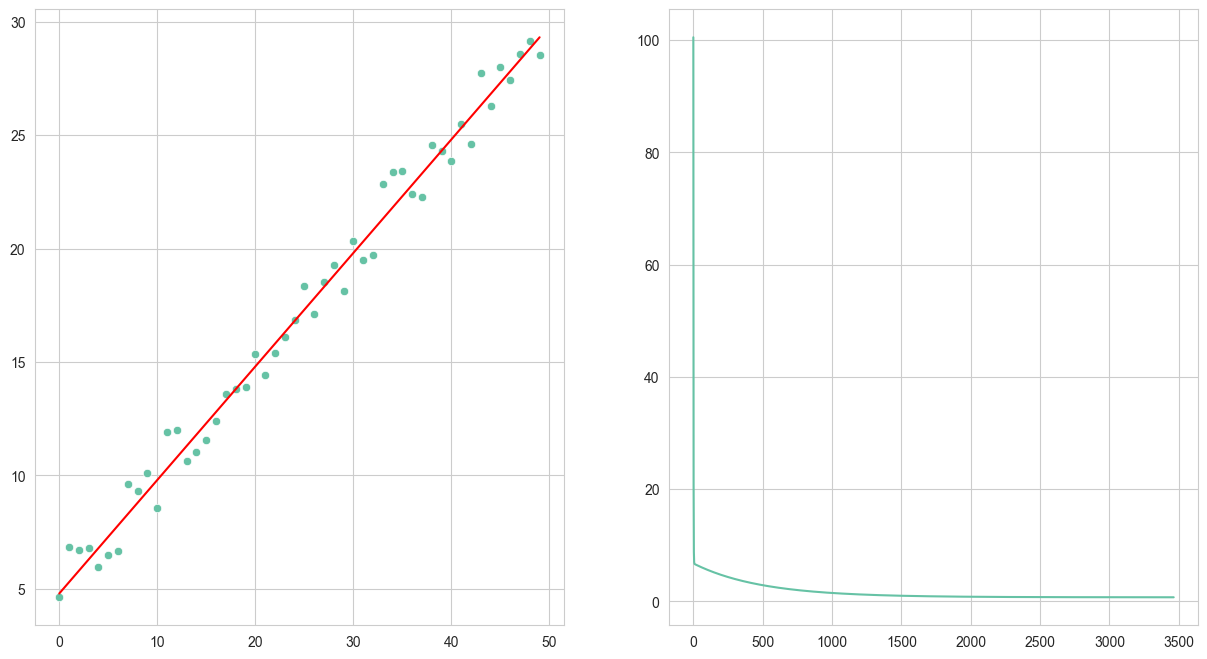

In [9]:
#Task: annotate each line of this code to understand what each step is doing
fig, axes = plt.subplots(figsize=(15, 8), ncols=2)

y_pred = w1*X[:,0] + w2*X[:, 1] + w3
sns.scatterplot(x=x, y=y, ax=axes[0])
sns.lineplot(x=X[:, 1], y=y_pred, ax=axes[0], color='red')

sns.lineplot(mse, ax=axes[1])


## Plot Trend Line & Loss Optimization with a Small Learning Rate

Text(0, 0.5, 'MSE')

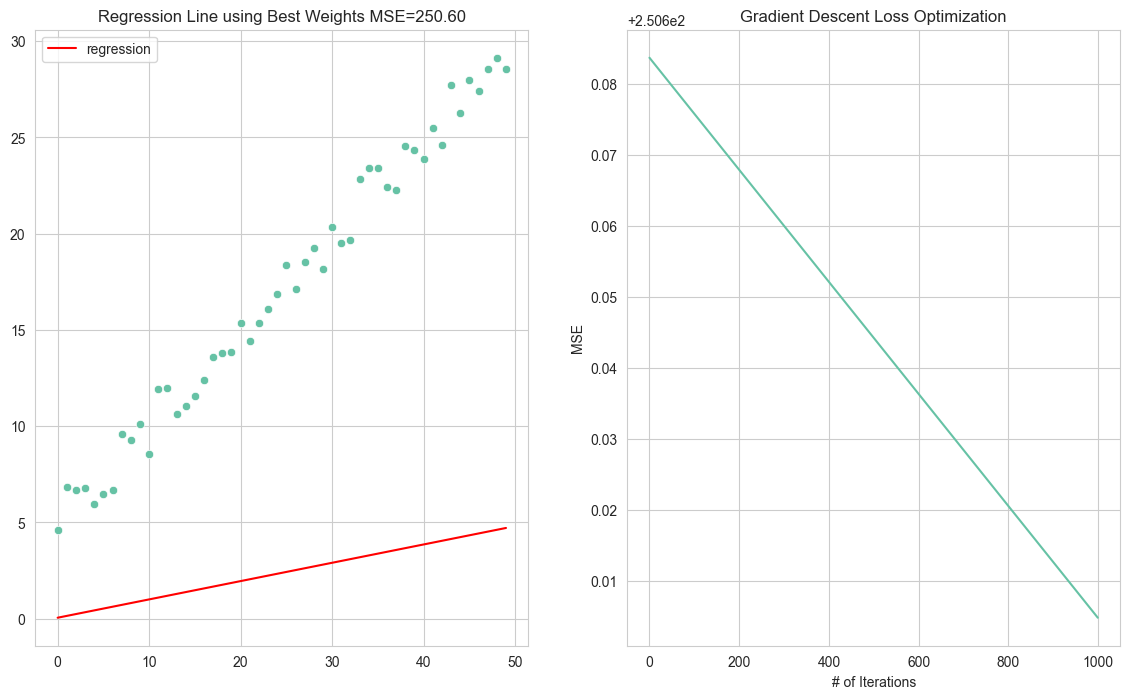

In [10]:
w1, w2, w3, log, mse = run_gradient_descent(X, y, learning_rate=1e-10, max_iter=1000)
fig, axes = plt.subplots(figsize=(14,8), ncols=2)

#render our regression line using best weights 
y_pred = w1*X[:,0] + w2*X[:, 1] +  w3
sns.scatterplot(x=x, y=y, ax=axes[0])
sns.lineplot(x=X[:, 1], y=y_pred, ax=axes[0], label="regression", color="red")
axes[0].set_title(f"Regression Line using Best Weights MSE={mse[-1]:.2f}")

sns.lineplot(mse, ax=axes[1])
axes[1].set_title("Gradient Descent Loss Optimization")
axes[1].set_xlabel("# of Iterations")
axes[1].set_ylabel("MSE")


## Plot Trend Line & Loss Optimization with a Large Learning Rate

Text(0, 0.5, 'MSE')

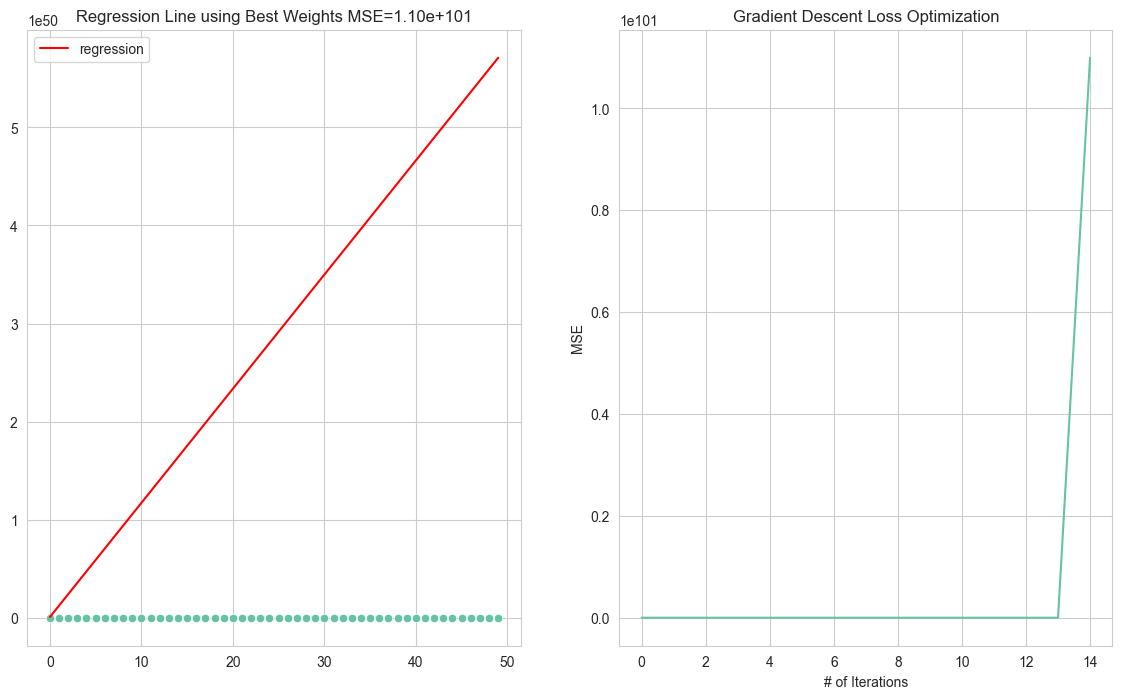

In [11]:
w1, w2, w3, log, mse = run_gradient_descent(X, y, learning_rate=1.2, max_iter=15)
fig, axes = plt.subplots(figsize=(14,8), ncols=2)

#render our regression line using best weights 
y_pred = w1*X[:,0] + w2*X[:, 1] +  w3
sns.scatterplot(x=x, y=y, ax=axes[0])
sns.lineplot(x=X[:, 1], y=y_pred, ax=axes[0], label="regression", color="red")
axes[0].set_title(f"Regression Line using Best Weights MSE={mse[-1]:.2e}")

sns.lineplot(mse, ax=axes[1])
axes[1].set_title("Gradient Descent Loss Optimization")
axes[1].set_xlabel("# of Iterations")
axes[1].set_ylabel("MSE")

## SKLearn Linear Regression

In [12]:
#Make sure to read the documentations for this SKLearn function
from sklearn.linear_model import LinearRegression

We'll be using another dataset for the regression task since we need continuous values as labels / outputs / targets. One readily-available dataset for this is the **Diabetes Dataset**.



**note:**
       The meaning of each feature (i.e. `feature_names`) might be unclear
       (especially for `ltg`) as the documentation of the original dataset is
       not explicit. We provide information that seems correct in regard with
       the scientific literature in this field of research.


In [13]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes.target[:3]

array([151.,  75., 141.])

In [14]:
diabetes.data.shape

(442, 10)

In [15]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [16]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (442, 10), Output: (442,)
Train Set Size | Input: (353, 10), Output: (353,)
Test Set Size | Input: (89, 10), Output: (89,)


In [17]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.4526027629719197

In [18]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)

2900.19362849348

In [19]:
reg.coef_

array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
       -931.48884588,  518.06227698,  163.41998299,  275.31790158,
        736.1988589 ,   48.67065743])

## Check feature importance

In [20]:
feature_names = diabetes.feature_names

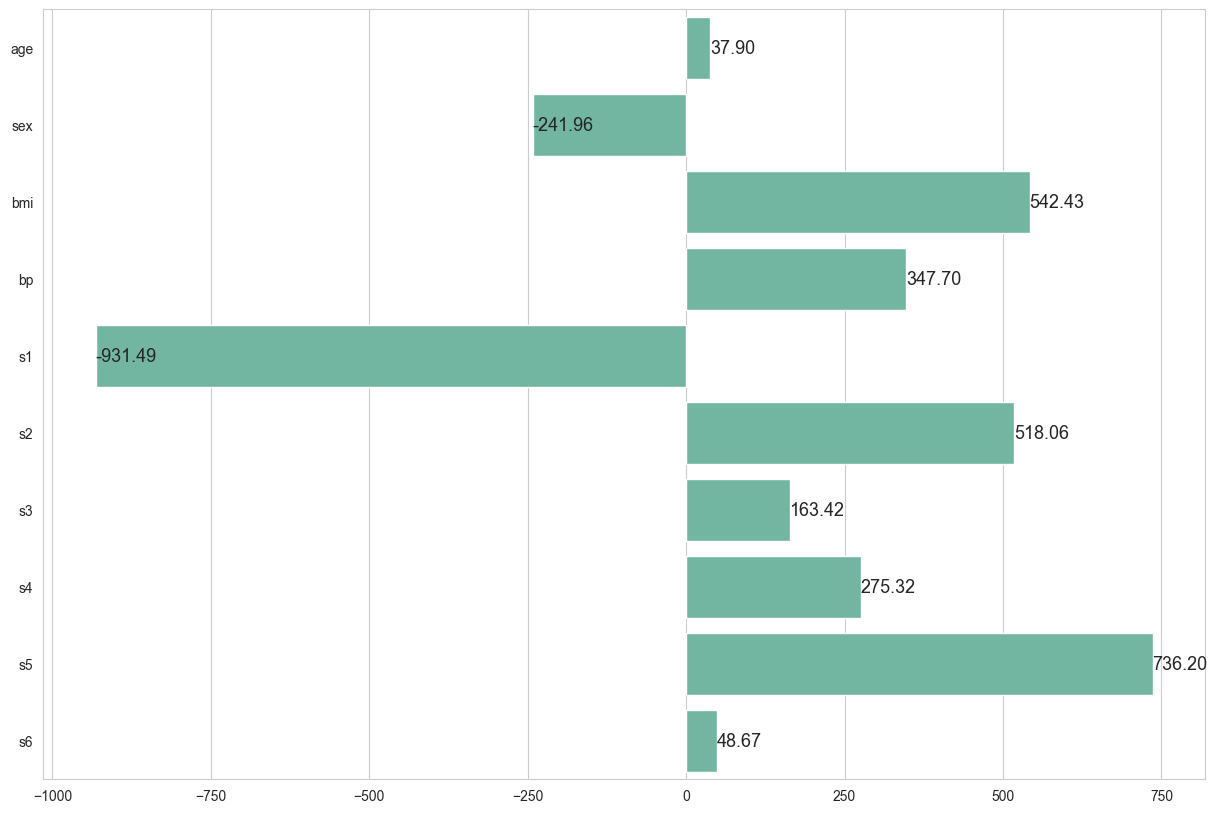

In [21]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=reg.coef_, y=feature_names)

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width - .5,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center',
            fontsize=13)  # vertical alignment

## Plot trend line

In [22]:
X_test[:, 5]

array([ 0.1251981 , -0.01665815,  0.04878988,  0.03657709,  0.05317395,
        0.0941964 ,  0.03375875,  0.08887288, -0.03043668,  0.04816358,
        0.04158746, -0.06832765, -0.05454912,  0.02029337, -0.02918409,
       -0.06269098,  0.01590929,  0.03751653, -0.10684491,  0.02060651,
       -0.03450761,  0.05004247, -0.02260797,  0.01183836, -0.00757685,
       -0.00131388,  0.00119131, -0.01665815, -0.04703355,  0.04785043,
        0.03970857,  0.01998022,  0.00620169, -0.00162703,  0.06068952,
        0.0644473 , -0.00100073,  0.04284006,  0.03563764, -0.01258722,
       -0.00914259, -0.01571871, -0.04515466,  0.02029337, -0.01571871,
        0.01716188, -0.02761835, -0.08993489, -0.03419447, -0.02166853,
       -0.07239858, -0.01070833,  0.04597154, -0.0175976 ,  0.10766179,
       -0.01728445,  0.03626394, -0.03482076, -0.01133463, -0.08649026,
        0.09200436, -0.03043668, -0.04891244, -0.00037443,  0.01434355,
        0.04284006,  0.07290231, -0.00507166, -0.07051969,  0.00

Text(0, 0.5, 'Actual disease progression')

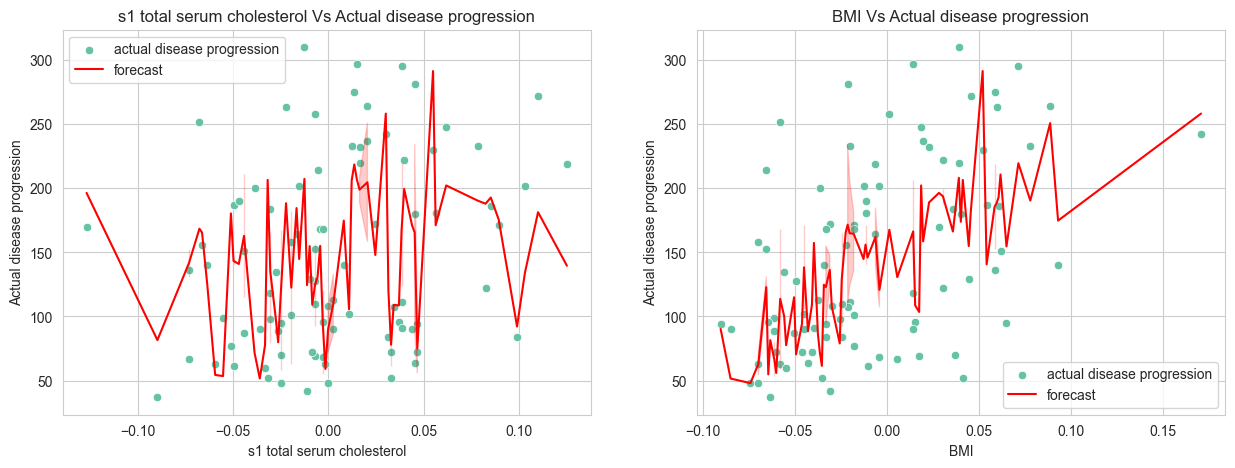

In [23]:
y_pred = reg.predict(X_test)
fig, axes = plt.subplots(figsize=(15,5), ncols=2)

sns.scatterplot(x=X_test[:, 4],y=y_test, label='actual disease progression', ax=axes[0])
sns.lineplot(x=X_test[:, 4], y=y_pred, color='red', label='forecast', ax=axes[0])
axes[0].set_title("s1 total serum cholesterol Vs Actual disease progression")
axes[0].set_xlabel("s1 total serum cholesterol")
axes[0].set_ylabel("Actual disease progression")

sns.scatterplot(x=X_test[:, 2],y=y_test, label='actual disease progression', ax=axes[1])
sns.lineplot(x=X_test[:, 2], y=y_pred, color='red', label='forecast', ax=axes[1])
axes[1].set_title("BMI Vs Actual disease progression")
axes[1].set_xlabel("BMI")
axes[1].set_ylabel("Actual disease progression")


## Linear Regression using ScipyStats

If you are getting a module not found error you might have to install the scipy package. Run the command be low on your anaconda shell to install the package.

`conda install -c conda-forge statsmodels`

In [24]:
import statsmodels.api as sm

In [25]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

reg =  sm.OLS(y_train, X_train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.136
Model:                            OLS   Adj. R-squared (uncentered):              0.110
Method:                 Least Squares   F-statistic:                              5.378
Date:                Fri, 31 May 2024   Prob (F-statistic):                    2.13e-07
Time:                        23:33:22   Log-Likelihood:                         -2293.0
No. Observations:                 353   AIC:                                      4606.
Df Residuals:                     343   BIC:                                      4645.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           125.2103    206.271      0.607      0.544    -280.505     530.925
x2          -258.2010    204.877     -1.260      0.208    -661.175     144.773
x3           627.4872    229.885      2.730      0.007     175.325    1079.649
x4           346.3131    213.207      1.624      0.105     -73.045     765.671
x5          -803.3488   1347.937     -0.596      0.552   -3454.612    1847.914
x6           312.9159   1087.873      0.288      0.774   -1826.826    2452.657
x7            45.1232    696.190      0.065      0.948   -1324.216    1414.463
x8           211.9889    553.944      0.383      0.702    -877.566    1301.544
x9           700.8818    574.980      1.219      0.224    -430.049    1831.813
x10          144.6871    219.349      0.660      0.510    -286.751     576.126
==============================================================================
Omnibus:                        0.382   Durbin-Watson:                   0.209
Prob(Omnibus):                  0.826   Jarque-Bera (JB):                0.510
Skew:                           0.033   Prob(JB):                        0.775
Kurtosis:                       2.826   Cond. No.                         20.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""